In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

from IPython.display import Image, HTML

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train data shape {}'.format(X_train.shape))

11493376/11490434 [==============================] - 18s 2us/step
Train data shape (60000, 28, 28)


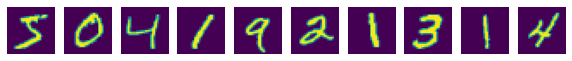

In [4]:
fig, ax = plt.subplots(1, 10, figsize=(10, 4))
for i in range(10):
    ax[i].imshow(X_train[i]), ax[i].axis('off')

In [5]:
#Reshape input data - Tensorflow likes TENSORS!
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('Train data shape {}'.format(X_train.shape))

Train data shape (60000, 28, 28, 1)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [9]:
#http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf

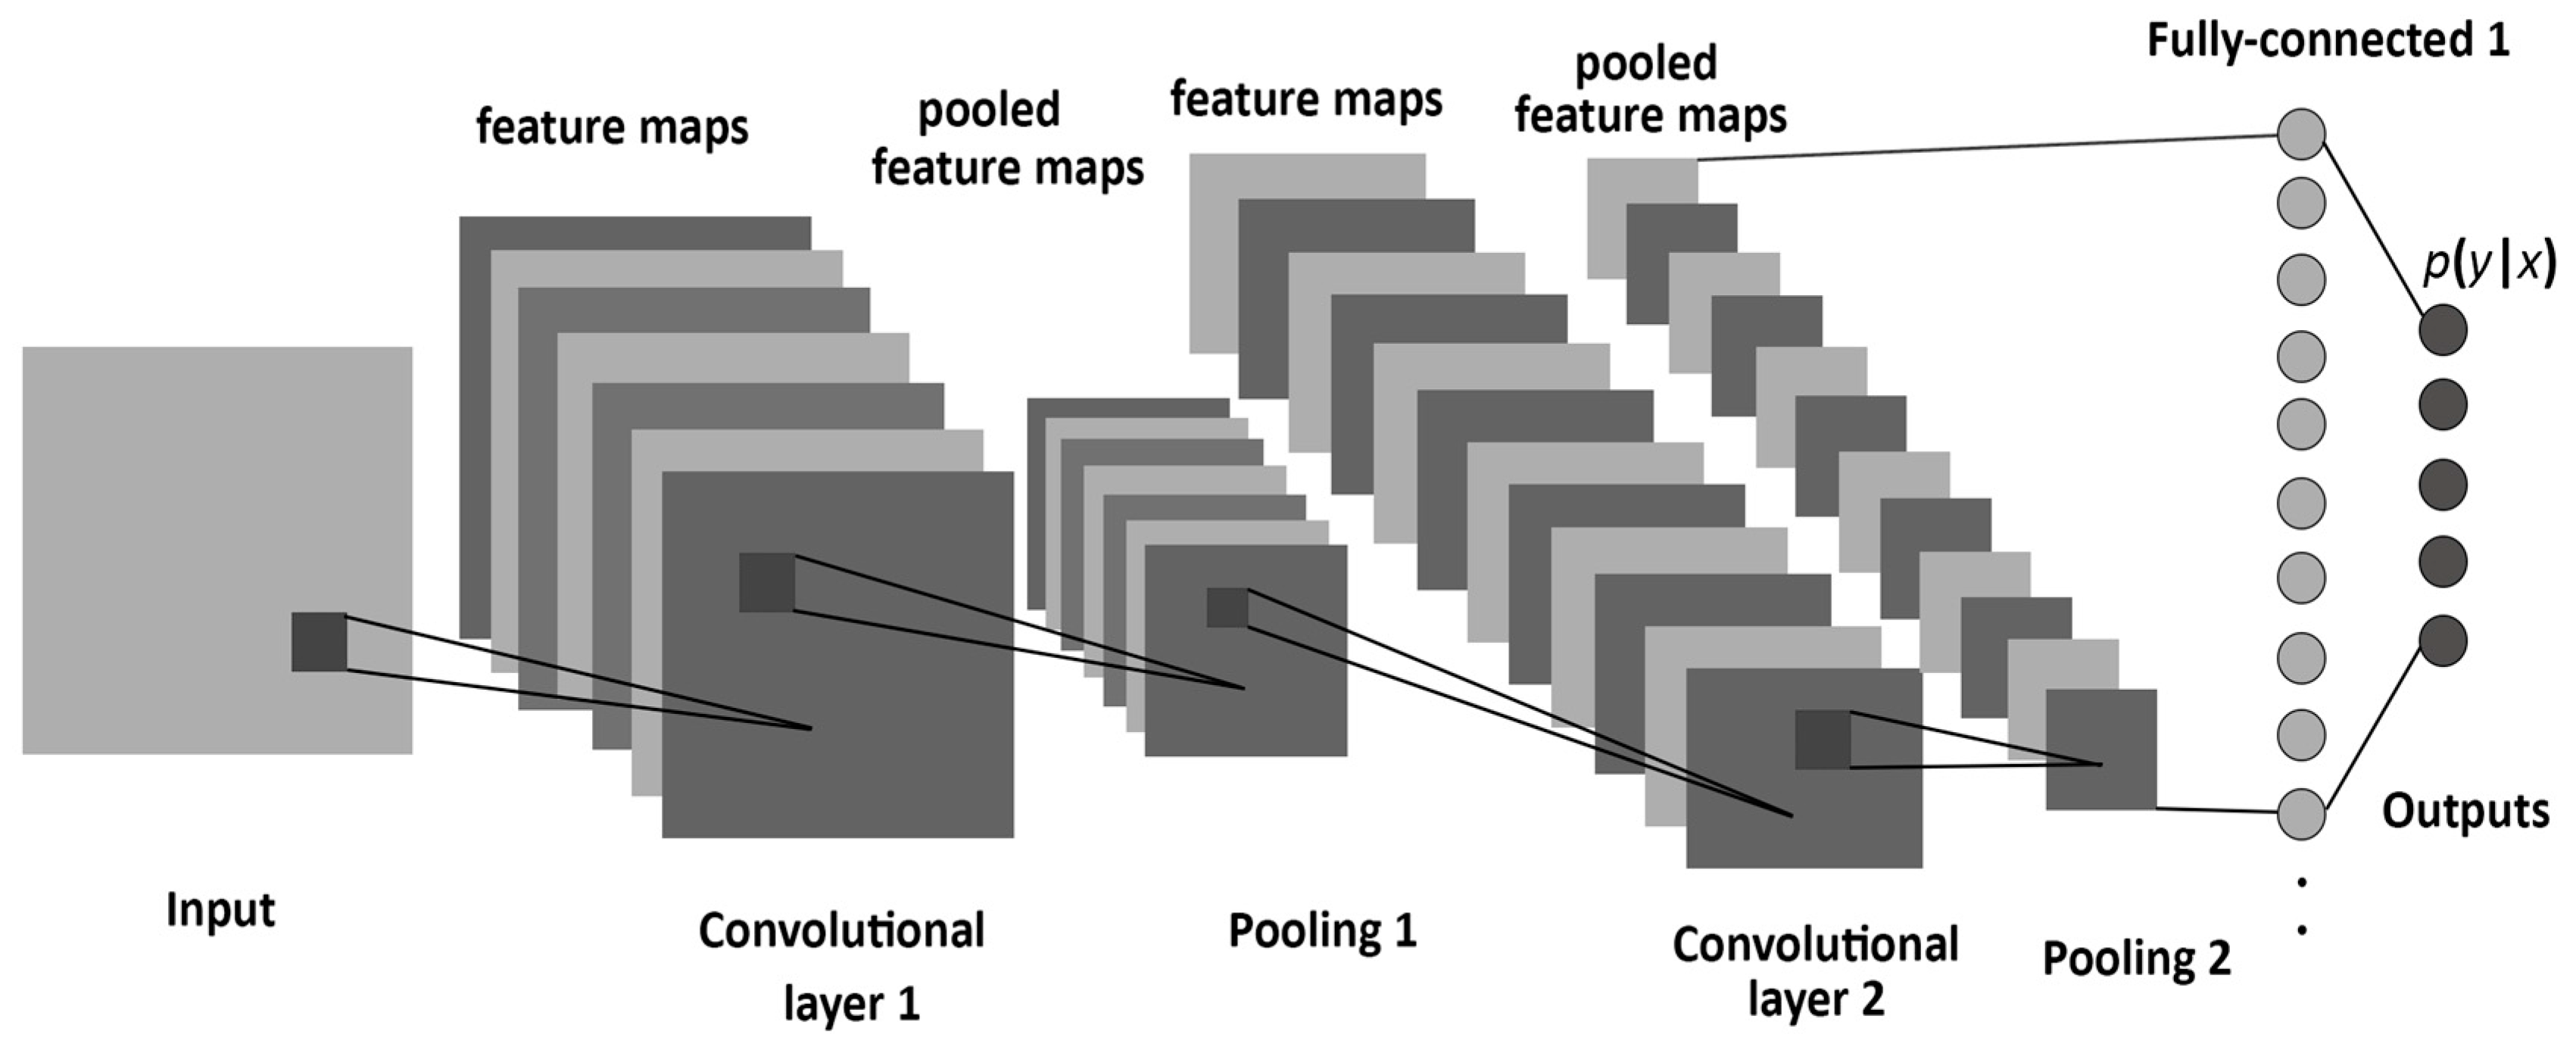

In [10]:
Image('img/conv.png')

In [11]:
# https://github.com/vdumoulin/conv_arithmetic
HTML('<img src="img/convolution.gif">')

#https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

    "VALID" = without padding:

       inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                      |________________|                dropped
                                     |_________________|

    "SAME" = with zero padding:

                   pad|                                      |pad
       inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
                   |________________|
                                  |_________________|
                                                 |________________|



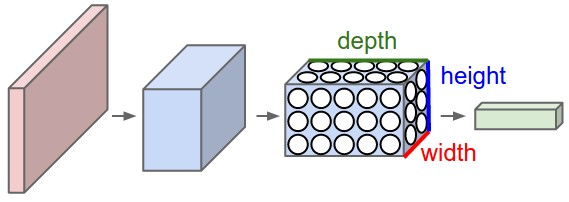

In [12]:
Image('img/depth.jpg')

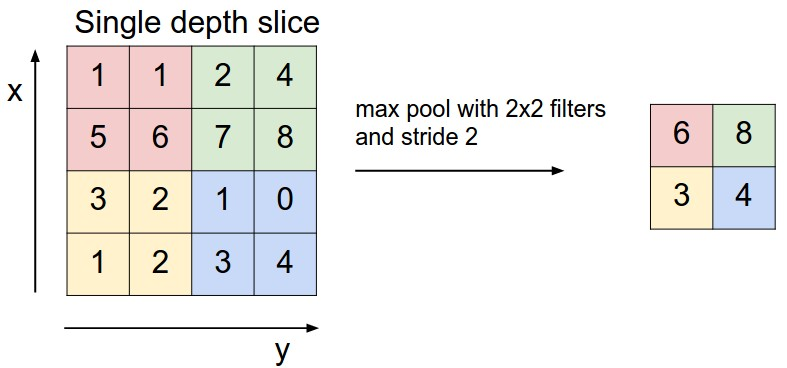

In [13]:
Image('img/pool.jpg') 

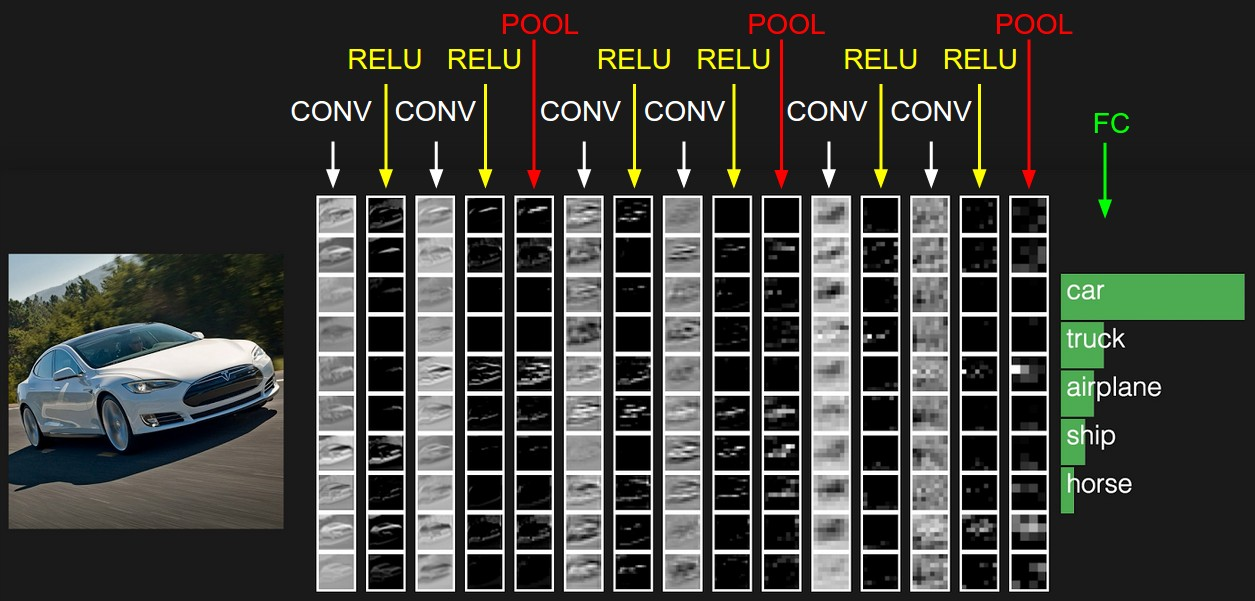

In [14]:
Image('img/convnet.jpg')

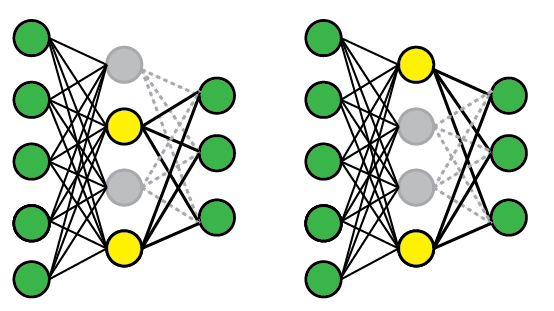

In [15]:
Image('img/dropout.png')

In [16]:
# http://scs.ryerson.ca/~aharley/vis/conv/

In [21]:
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Dense
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28, 1), name='block1_conv1'))
    model.add(MaxPooling2D(pool_size=(2,2), name='block1_maxpool'))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax', name='prediction'))
    
    return model
model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
prediction (Dense)           (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [18]:
HTML('<img src="img/opt.gif">')
#There are some cases that Adam doesnt work so well, remeber about Boston House prices?

In [19]:
from keras import optimizers

model = cnn_model()

model.compile(optimizer=optimizers.Adam(lr=0.001, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs = 5, 
                    shuffle = True,
                    verbose=1)

Epoch 1/5
60000/60000 [==============================] - 19s 317us/step - loss: 0.2663 - acc: 0.9193
Epoch 2/5
60000/60000 [==============================] - 22s 369us/step - loss: 0.1157 - acc: 0.9652
Epoch 3/5
60000/60000 [==============================] - 24s 394us/step - loss: 0.0870 - acc: 0.9740
Epoch 4/5
60000/60000 [==============================] - 20s 340us/step - loss: 0.0697 - acc: 0.9787
Epoch 5/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.0604 - acc: 0.9814


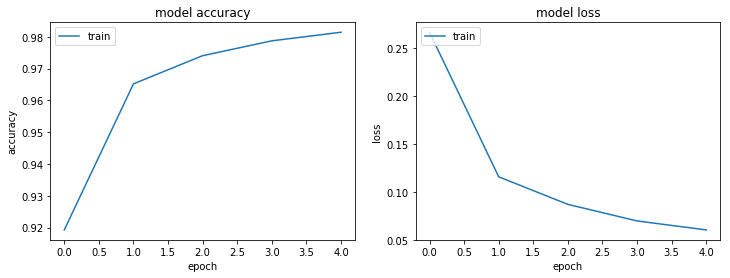

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')

# summarize history for loss
ax2.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('{} : {}, {} : {}'.format(model.metrics_names[0],score[0], model.metrics_names[1], score[1]))

loss : 0.043005267665487915, acc : 0.9868


### Visualize 

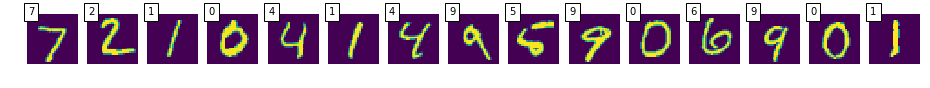

In [23]:
slices = 15
predicted = model.predict(X_test[:slices]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slices):
    plt.subplot(1, slices, i+1)
    plt.imshow(X_test[i, :,:,0], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [25]:
for it, mod in enumerate(model.layers):
    print('Layer no: {}, name: {}'.format(it, mod.name))

Layer no: 0, name: block1_conv1
Layer no: 1, name: block1_maxpool
Layer no: 2, name: flatten_1
Layer no: 3, name: fc1
Layer no: 4, name: dropout_1
Layer no: 5, name: prediction


In [24]:
import keras.backend as K
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

Number of filters: 32 in layer: block1_conv1


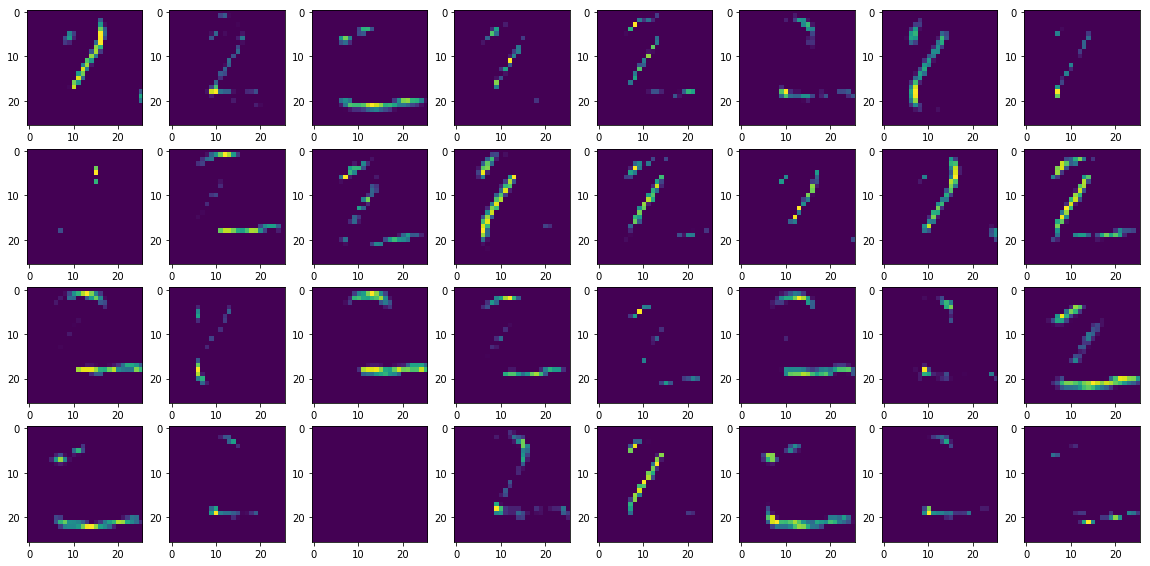

In [26]:
input_img_data = np.expand_dims(X_test[1], axis=0) #Select image
layer = model.layers[0]  #Select layer
activations = get_activations(model, layer, input_img_data)

print('Number of filters: {} in layer: {}'.format(layer.filters, layer.name))  # no. of filters in the selected conv block

activated_img = activations[0][0]
fig = plt.figure(figsize=(20, 20))
for i in range(int(layer.filters / 8)):
    for j in range(8):
        idx = (8*i)+j
        ax = fig.add_subplot(8, 8, idx+1)
        ax.imshow(activated_img[:,:,idx])

### Next time

- Callbacks
- Autoencoders https://github.com/leriomaggio/deep-learning-keras-tensorflow/blob/master/6.%20AutoEncoders%20and%20Embeddings/6.1.%20AutoEncoders%20and%20Embeddings.ipynb
- Popular architectures
- Image generation
- Transfer learning